# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
# Format Specifier
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url)

# Fetch current ETH price
eth_price = requests.get(eth_url)

# Compute current value of my crpto
btc_response = btc_price.content
eth_response = eth_price.content
btc_data = btc_price.json()
eth_data = eth_price.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41316.00
The current value of your 5.3 ETH is $12110.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
load_dotenv("keys.env")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [8]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
type(api)

alpaca_trade_api.rest.REST

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2022-01-19 00:00:00-05:00  111.7  111.89  111.65  111.71  7641972  458.17   

                                                               
                               high     low   close    volume  
time                                                           
2022-01-19 00:00:00-05:00  459.6124  451.46  451.79  95311817

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.71
Current SPY closing price: $451.79


In [12]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22589.50
The current value of your 200 AGG shares is $22342.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_portfolio_dictionary = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(total_portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,53426.712
Shares,44931.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

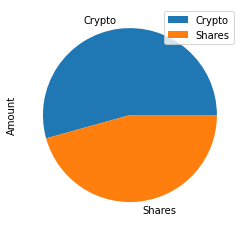

In [14]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()
total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You reached your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations! You have more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-19', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df.dropna()

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.09  5729791  282.73   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.49  8569565  281.04   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.20  4266243  280.08   
2018-02-05 00:00:00-05:00  107.12  107.810  107.00  107.63  4879995  273.47   
2018-02-06 00:00:00-05:00  107.46  107.560  107.28  107.30  5489931  259.99   

                                                              
                             high     low   close     volume  
time                                                          
2018-01-31 00:00:00-05:00  283.30  280.68  281.91   76360186  
2018-02-01 00:00:00-05:00  283.06  280.68  281.60   64693558  
2018-02-02 00:00:00-05:00  280.23  275.41  275.52  121717871  
2018-02-05 00:00:00-05:00  275.85  263.31  264.18  205971586  
2018-02-06 00:00:00-05:00  269.70  254.12  269.18  232359323

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [19]:
# Printing the simulation input data
MC.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
time                                                                  
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.09  5729791   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.49  8569565   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.20  4266243   
2018-02-05 00:00:00-05:00  107.12  107.810  107.00  107.63  4879995   
2018-02-06 00:00:00-05:00  107.46  107.560  107.28  107.30  5489931   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-31 00:00:00-05:00          NaN  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   
2018-02-05 00:00:00-05:00     0.004011  273.47  275.85  263.31  264.18   
2018-02-06 00:00:00-05:00    -0.003066  259.99  269.70  254.12  269.18   

                                                   
                              volume daily_return  
time                                               
2018-01-31 00:00:00-05:00   76360186          NaN  
2018-02-01 00:00:00-05:00   64693558    -0.001100  
2018-02-02 00:00:00-05:00  121717871    -0.021591  
2018-02-05 00:00:00-05:00  205971586    -0.041159  
2018-02-06 00:00:00-05:00  232359323     0.018926

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/focraniv/Desktop/homework_repo/hw_5/Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995733,0.992400,0.998535,1.000688,1.008550,1.006686,1.001597,0.995496,0.993762,0.975283,...,0.993859,0.999107,0.998138,0.999217,1.003171,1.002514,0.991100,0.997376,0.989151,1.007284
2,1.005448,0.990537,1.012847,0.994321,1.013542,1.003022,0.992897,1.000750,0.992057,0.982278,...,0.988823,1.010227,0.994659,0.988819,0.996768,0.997161,1.002953,0.997513,0.999642,0.993808
3,0.998129,0.990244,1.009111,0.981528,1.017690,1.006517,1.000123,1.009024,0.991340,0.983721,...,0.996533,1.015536,1.015387,0.999610,1.013061,1.002313,1.006727,0.999059,0.986943,0.983903
4,0.994234,0.989831,1.007931,0.998573,1.029507,1.011999,1.004906,1.017728,0.989025,0.978831,...,0.991457,1.019937,1.022180,1.000680,1.011784,1.006251,0.997521,0.994502,0.985246,0.982324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.536019,0.983080,5.225382,6.712709,6.135308,17.791281,16.019555,11.942522,13.574749,6.279179,...,17.286777,19.054847,30.502406,13.709509,4.880613,6.174604,39.065081,8.297052,3.935669,12.908827
7557,13.574432,0.960534,5.253822,6.697635,6.202175,17.884112,16.187837,12.056525,13.470879,6.347739,...,17.381586,19.143285,30.863799,13.790591,4.843781,6.147557,38.944956,8.276014,3.991331,12.954765
7558,13.678882,0.970131,5.243850,6.735436,6.240999,17.923714,16.564530,11.908338,13.402548,6.300642,...,17.211789,19.221383,31.047231,13.556044,4.748795,6.224134,38.978837,8.310419,3.988173,12.918079
7559,13.778124,0.975761,5.281362,6.677781,6.260256,17.898440,16.636054,11.831134,13.730810,6.318376,...,17.155820,19.116425,31.208014,13.463028,4.717071,6.249554,38.773575,8.291039,3.998921,12.943737


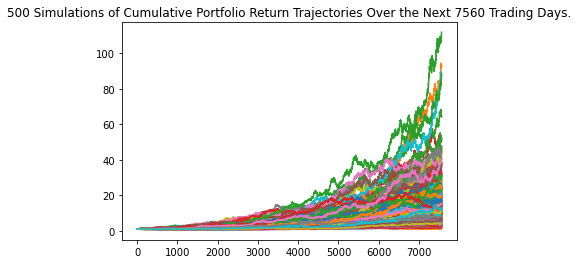

In [21]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

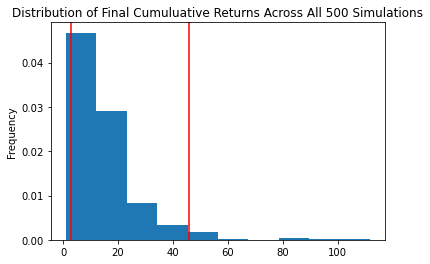

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             14.884385
std              12.513797
min               0.979537
25%               6.959590
50%              11.623187
75%              18.799839
max             111.753184
95% CI Lower      2.838817
95% CI Upper     45.896543
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $56776.34 and $917930.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $85164.51 and $1376896.28
